# 2nd Round Interview for Junior Data Scientist Position


## The Business Question: How we can detect bad end-users based on the information about their IP addresses?
    

How does this help Telesign? 
- Finding new and improved ways to utilize ip data efficiently can improve Telesign's fraud detection, Score
- Add to Telesign's existing data 
- A more effective fraud detection product can help expand markets and businesses 

Tasks/Solutions: 
1. to analyze the quality of the IP data offered/presented in the sample TS Sample DS candidates.csv ; to perform comparative analysis of the two data sources in order to make conclusions about the accuracy of the data, i.e. to make the decision (if possible) which data source is the most accurate and recommended for the further research,

2. to conduct the research regarding the predictive power of the IP data (from the sample mentioned above) for the fraud detection problem (i.e. predictive power regarding the target variable fraud label),

3. to try to identify specific patterns in the end-user behavior based on the IP data presented in the three samples mentioned above.


Sources: https://medium.com/@polanitzer/fraud-detection-in-python-predict-fraudulent-credit-card-transactions-73992335dd90


## Libraries and settings

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import random

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['font.size'] = 15
random.seed(0)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


## Importing data and overview

In [3]:
# df_source1 = pd.read_csv('source1.csv')
# df_source1 = pd.read_csv('source2.csv')
df_main = pd.read_csv('TS_Sample_DS_candidates.csv', encoding='latin-1')


In [4]:
df_main.shape


(48474, 51)

In [5]:
df_main.head()


,fraud_label,utc_time_stamp,phone_number_hash,country_iso2,ip_address_hash,start_ip_source1,end_ip_source1,continent_source1,country_source1,country_code_source1,country_cl_source1,state_source1,state_cl_source1,city_source1,city_cl_source1,time_zone_source1,home_source1,connection_type_source1,line_speed_source1,ip_routing_type_source1,asn_source1,carrier_source1,organization_source1,organization_type_source1,sld_source1,tld_source1,hosting_facility_source1,anonymizer_status_source1,proxy_last_detected_source1,proxy_type_source1,proxy_level_source1,continent_source2,country_source2,country_code_source2,country_cl_source2,city_source2,city_cl_source2,time_zone_source2,connection_type_source2,asn_source2,carrier_source2,isp_source2,organization_source2,organization_type_source2,domain_source2,proxy_is_legitimate_source2,proxy_is_anonymous_source2,proxy_is_anonymous_vpn_source2,proxy_is_hosting_provider_source2,proxy_is_public_source2,proxy_is_tor_source2
0,legit,05/01/2017 00:00:04.493,a090dcb8615eb80cfc6782092a598352,US,88383218c90dd4b355399a8df04cd54d,66.87.76.76,66.87.76.79,north america,united states,us,0.99,illinois,0.95,chicago,0.90,-6,True,ocx,high,fixed,10507,sprint personal communications systems,sprint chicago pop,Internet Service Provider,spcsdns,net,False,NaN,NaN,NaN,NaN,North America,United States,US,0.99,Chicago,0.20,America/Chicago,Cellular,10507.0,Sprint Personal Communications Systems,Sprint PCS,Sprint PCS,cellular,spcsdns.net,0,0,0,0,0,0
1,fraud,05/01/2017 00:00:06.577,a6fbb057e5a85f6c9fea7216a84859dd,BR,730baa254a10bb2c8fb1c9e72ecbbdbe,186.237.158.116,186.237.158.135,south america,brazil,br,0.99,parana,0.80,cianorte,0.61,-3,NaN,NaN,NaN,NaN,263553,giganet internet e informatica,giganet internet e informatica,NaN,giganetinternet,com.br,False,NaN,NaN,NaN,NaN,South America,Brazil,BR,0.99,Cianorte,0.80,America/Sao_Paulo,Cable/DSL,263553.0,GIGANET INTERNET E INFORMATICA,Giganet Internet E Informatica,Giganet Internet E Informatica,residential,giganetinternet.com.br,0,0,0,0,0,0
2,legit,05/01/2017 00:05:03.850,9f8c3f5cae001698989cd4a691f4ef39,EG,e70a2957367afa9b34f9b3d734024949,41.217.160.0,41.217.173.255,africa,egypt,eg,0.86,al iskandariyah,0.68,al iskandariyah,0.50,2,NaN,dsl,medium,fixed,24863,linkdotnet,net@net dsl network,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,Africa,Egypt,EG,0.8,Tanta,0.80,Africa/Cairo,Cable/DSL,24863.0,LINKdotNET,Link Egypt,NET@NET DSL Network,residential,NaN,0,0,0,0,0,0
3,legit,05/01/2017 00:06:08.760,090e49e3dea4040855e84c7703721ca9,TW,226484c53a9b312420339f52a2e77729,39.12.0.0,39.12.47.255,asia,taiwan,tw,0.95,taipei,0.23,taipei,0.23,8,False,mobile wireless,low,mobile gateway,9674,far easttone telecommunication co.%2C ltd.,panchiao taipei hsien taiwan,Telecommunications,fetnet,net,False,NaN,NaN,NaN,NaN,Asia,Taiwan,TW,0.7,Taichung,0.01,Asia/Taipei,Cellular,9674.0,"Far EastTone Telecommunication Co., Ltd.",Far EasTone Telecommunication Co.,Far EastTone Telecommunication Co.,cellular,fetnet.net,0,0,0,0,0,0
4,fraud,05/01/2017 00:06:46.483,5d3c3aefe8f5d7ff62be7a79a30f7261,BR,90f7f57bfddc8744d9d7b1668b8679e3,170.79.211.36,170.79.211.39,south america,brazil,br,0.99,sao paulo,0.95,sao vicente,0.90,-3,NaN,NaN,NaN,NaN,52980,netion solu es em internet via r dio ltda.,netion solu es em internet via r dio ltda.,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,South America,Brazil,BR,0.99,Praia Grande,0.60,America/Sao_Paulo,Cable/DSL,52980.0,Netion Soluções em Internet Via Rádio Ltda.,Netion Soluções em Internet Via Rádio Ltda.,Netion Soluções em Internet Via Rádio Ltda.,residential,NaN,0,0,0,0,0,0


In [6]:
src1 = df_main.drop([col for col in df_main.columns if '_source2' in col], axis=1)
src2 = df_main.drop([col for col in df_main.columns if '_source1' in col], axis=1)


In [7]:
src1_features=src1.columns.to_list()
src2_features=src2.columns.to_list()

First, let's conduct a basic analysis on data quality from both sources by assessing if the data is: 
    - complete
    - unique 
    - timely 
    - consistent 
    - valid 
    - accurate 

In [8]:
#Are feature values complete? 
nan_count_src1 = src1.isna().sum() * 100/len(src1)
nan_count_src1.sort_values(ascending=False, inplace=True)
nan_count_src1

proxy_level_source1            91.422206
proxy_type_source1             91.422206
proxy_last_detected_source1    91.422206
anonymizer_status_source1      91.422206
sld_source1                    30.193506
tld_source1                    29.551925
organization_type_source1      23.220696
home_source1                   21.033956
line_speed_source1             13.677435
connection_type_source1        13.677435
ip_routing_type_source1        13.374180
state_source1                   1.322358
city_source1                    1.322358
carrier_source1                 0.412592
organization_source1            0.280563
country_iso2                    0.018567
hosting_facility_source1        0.000000
asn_source1                     0.000000
fraud_label                     0.000000
utc_time_stamp                  0.000000
city_cl_source1                 0.000000
state_cl_source1                0.000000
country_cl_source1              0.000000
country_code_source1            0.000000
country_source1 

In [9]:
nan_count_src2 = src2.isna().sum() * 100/len(src2)
nan_count_src2.sort_values(ascending=False, inplace=True)
nan_count_src2

domain_source2                       34.616495
city_cl_source2                      12.031192
city_source2                         12.029129
time_zone_source2                     1.604984
connection_type_source2               0.321822
country_code_source2                  0.202170
country_source2                       0.183604
continent_source2                     0.084581
carrier_source2                       0.039196
organization_type_source2             0.018567
country_iso2                          0.018567
asn_source2                           0.014441
proxy_is_hosting_provider_source2     0.000000
proxy_is_public_source2               0.000000
proxy_is_anonymous_source2            0.000000
proxy_is_legitimate_source2           0.000000
proxy_is_anonymous_vpn_source2        0.000000
fraud_label                           0.000000
organization_source2                  0.000000
isp_source2                           0.000000
utc_time_stamp                        0.000000
country_cl_so

Observations: 
    - There are no common features between the two datasources 
    - datasource1 src1 has more features, but a number of features have   mostly null values 
    
reference: https://pandas.pydata.org/pandas-docs/version/1.3.1/getting_started/intro_tutorials/09_timeseries.html

In [10]:
#Is data timely? 
#Split time data into 'Dates' and 'Time' columns 
src1['Date'] = pd.to_datetime(src1['utc_time_stamp']).dt.date
src1['Time'] = pd.to_datetime(src1['utc_time_stamp']).dt.time


In [11]:
src1['fraud_label'] = src1['fraud_label'].replace({'legit':0, 'fraud':1})
src2['fraud_label'] = src2['fraud_label'].replace({'legit':0, 'fraud':1})


Text(0, 0.5, 'fraud cases')

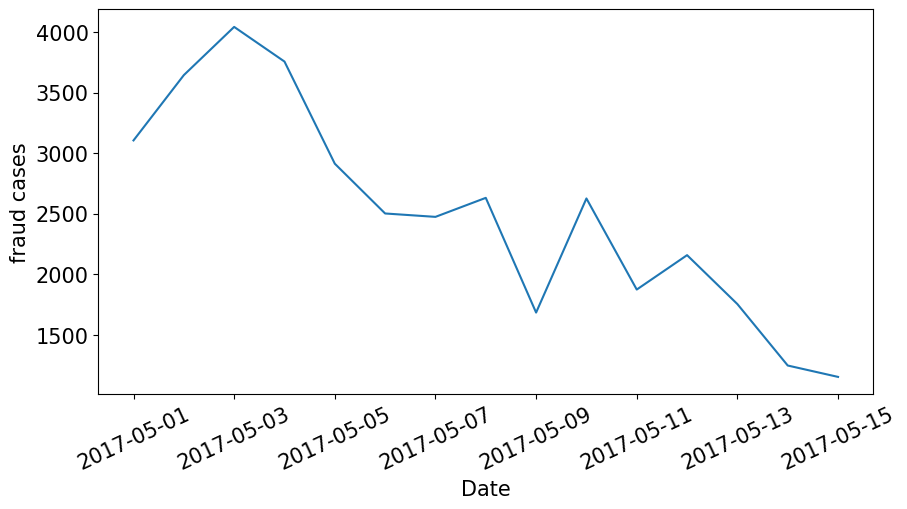

In [12]:
timeline_src1 = src1.groupby('Date').sum().reset_index()
timeline_src1['fraud_ratio'] = ((timeline_src1['fraud_label']/len(src1)) * 100)
ax = sns.lineplot(x='Date', y='fraud_label',data=timeline_src1 )
plt.xticks(rotation=25)
plt.ylabel('fraud cases')

In [13]:
timeline_src1['Date'].unique()


array([datetime.date(2017, 5, 1), datetime.date(2017, 5, 2),
       datetime.date(2017, 5, 3), datetime.date(2017, 5, 4),
       datetime.date(2017, 5, 5), datetime.date(2017, 5, 6),
       datetime.date(2017, 5, 7), datetime.date(2017, 5, 8),
       datetime.date(2017, 5, 9), datetime.date(2017, 5, 10),
       datetime.date(2017, 5, 11), datetime.date(2017, 5, 12),
       datetime.date(2017, 5, 13), datetime.date(2017, 5, 14),
       datetime.date(2017, 5, 15)], dtype=object)

In [14]:
timeline_src1.columns.to_list()


['Date',
 'fraud_label',
 'country_cl_source1',
 'state_cl_source1',
 'city_cl_source1',
 'time_zone_source1',
 'asn_source1',
 'hosting_facility_source1',
 'fraud_ratio']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '00:00:04.493000'),
  Text(1, 0, '00:00:06.577000'),
  Text(2, 0, '00:05:03.850000'),
  Text(3, 0, '00:06:08.760000'),
  Text(4, 0, '00:06:46.483000'),
  Text(5, 0, '00:09:19.930000'),
  Text(6, 0, '00:09:22.580000'),
  Text(7, 0, '00:09:27.537000'),
  Text(8, 0, '00:10:16.407000'),
  Text(9, 0, '00:10:24.517000'),
  Text(10, 0, '00:13:13.463000'),
  Text(11, 0, '00:13:55.937000'),
  Text(12, 0, '00:14:29.867000'),
  Text(13, 0, '00:14:39.937000'),
  Text(14, 0, '00:15:27.933000')])

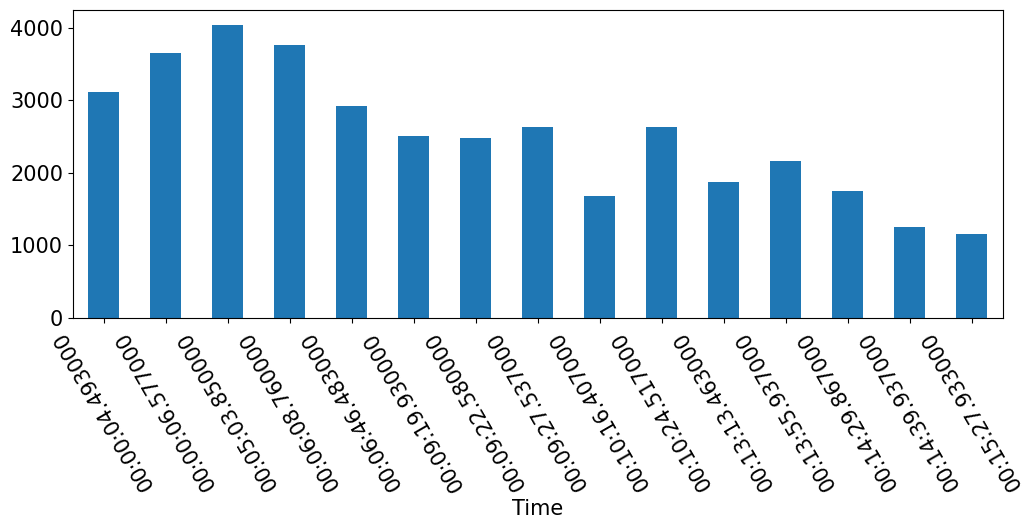

In [15]:
#What are the average fraud transactions for each time stamp of the day?   
fig, axs = plt.subplots(figsize=(12, 4))  
timeline_src1.groupby(src1["Time"])['fraud_label'].mean().plot(kind='bar', rot=0, ax=axs)
plt.xticks(rotation=120)

In [16]:
src1.describe()

,fraud_label,country_cl_source1,state_cl_source1,city_cl_source1,time_zone_source1,asn_source1
count,48474.000000,48474.000000,48474.000000,48474.000000,48474.000000,48474.000000
mean,0.775220,0.963325,0.764927,0.669679,-1.571482,26929.160643
std,0.417442,0.066665,0.261903,0.250188,5.042102,42770.177773
min,0.000000,0.400000,0.000000,0.000000,-10.000000,0.000000
25%,1.000000,0.990000,0.740000,0.500000,-6.000000,7922.000000
50%,1.000000,0.990000,0.870000,0.760000,-3.000000,14618.000000
75%,1.000000,0.990000,0.950000,0.900000,2.000000,29465.000000
max,1.000000,0.990000,0.990000,0.990000,13.000000,394380.000000


In [83]:
def get_num_outliers (column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    return sum((column<q1) | (column>q3))

In [84]:
src1.groupby('fraud_label').agg([get_num_outliers])

,country_cl_source1,state_cl_source1,city_cl_source1,time_zone_source1,asn_source1,Date
,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers
fraud_label,,,,,,
fraud,7888,10013,10700,13900,16496,14942
legit,1735,2925,2856,4614,5433,4475


In [85]:
src2.groupby('fraud_label').agg([get_num_outliers])

,city_cl_source2,asn_source2,proxy_is_legitimate_source2,proxy_is_anonymous_source2,proxy_is_anonymous_vpn_source2,proxy_is_hosting_provider_source2,proxy_is_public_source2,proxy_is_tor_source2
,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers,get_num_outliers
fraud_label,,,,,,,,
fraud,0,16513,21,2067,94,1618,420,38
legit,0,0,31,263,20,212,49,1


In [86]:
# def remove_outlier_IQR(df):
#     Q1=df.quantile(0.25)
#     Q3=df.quantile(0.75)
#     IQR=Q3-Q1
#     df_outlier=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
#     return df_removed_outlier

#How many outliers in numerical values? Let's use IQR technique to find out
# src1['fraud_label'] = src1['fraud_label'].replace({0:'legit', 1:'fraud'})
# src1_numerical_feat = ['country_cl_source1', 'state_cl_source1', 'city_cl_source1', 'time_zone_source1', 'asn_source1']

# dict_outliers_src1 = {}
# for feat in src1_numerical_feat:
#     df_outlier_removed = remove_outlier_IQR(src1[feat])
#     ind_diff = src1.index.difference(df_outlier_removed.index)
#     dict_outliers_src1[feat] = len(src1) - len(df_outlier_removed)
#     pd_outlier_count_src1 = pd.DataFrame(list(dict_outliers_src1.items()), columns=['feature', '# of outliers'])
# pd_outlier_count_src1.sort_values(ascending=False, by='# of outliers')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

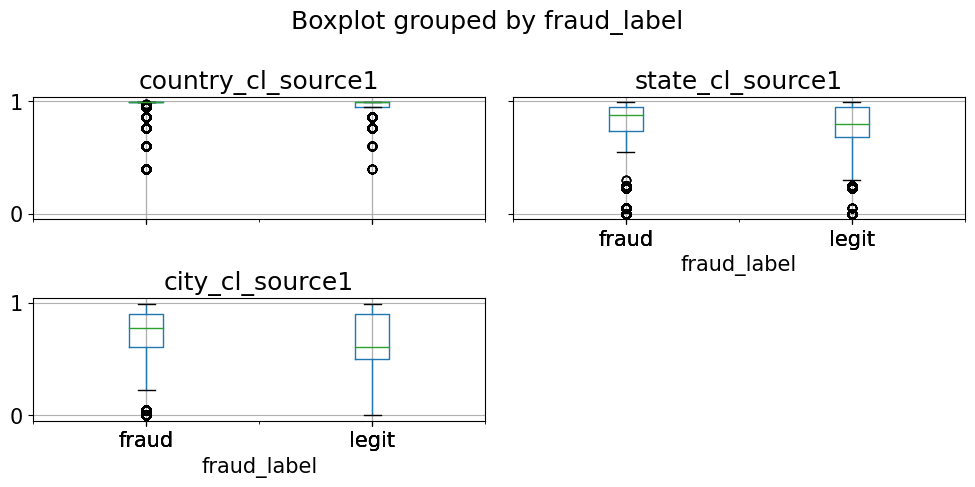

In [17]:
#Boxplot visualization
plt.rcParams["figure.autolayout"] = True

src1['fraud_label'] = src1['fraud_label'].replace({0:'legit', 1:'fraud'})
src1_numerical_feat = ['country_cl_source1', 'state_cl_source1', 'city_cl_source1', 'time_zone_source1', 'asn_source1']
src1_numerical_feat1 = ['country_cl_source1', 'state_cl_source1', 'city_cl_source1']
src1.boxplot(column=src1_numerical_feat1, by='fraud_label')
plt.xticks(rotation=90)

# for feat in src1_numerical_feat: 
#     src1.boxplot(column=feat, by='fraud_label')
#     outliers = [flier.get_ydata() for flier in bp["fliers"]]
#     boxes = [box.get_ydata() for box in bp["boxes"]]
#     medians = [median.get_ydata() for median in bp["medians"]]
#     whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

#     print("Outliers: ", outliers)
#     print("Boxes: ", boxes)
#     print("Medians: ", medians)
#     print("Whiskers: ", whiskers)

(array([0. , 0.5, 1. ]),
 [Text(0.0, 0, '0.0'), Text(0.5, 0, '0.5'), Text(1.0, 0, '1.0')])

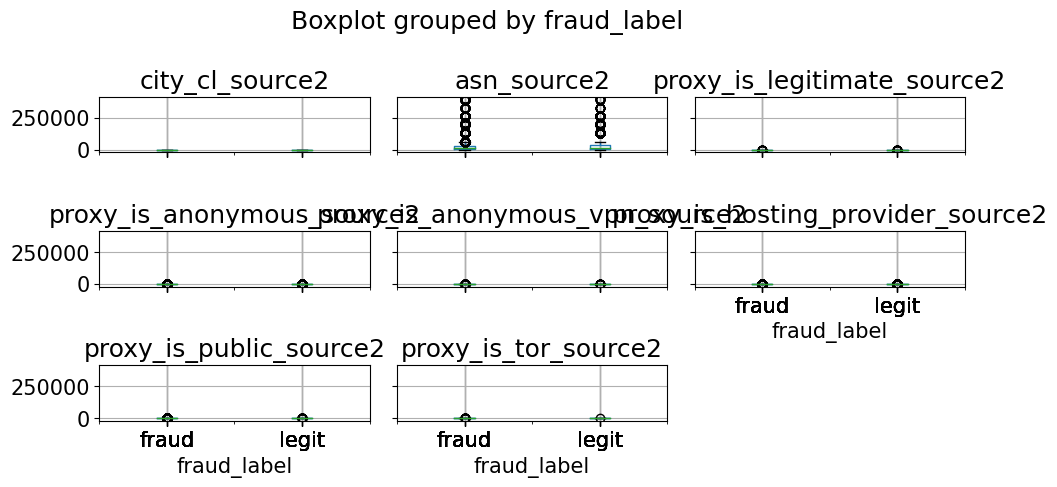

In [19]:
plt.rcParams["figure.autolayout"] = True

src2['fraud_label'] = src2['fraud_label'].replace({0:'legit', 1:'fraud'})
src2_num_feats = src2.describe().columns.to_list()
src2.boxplot(column=src2_num_feats, by='fraud_label')
plt.xticks(rotation=90)

In [21]:
#What is the fraud ratio for the whole dataset? 
print("\nfraud ratio for src1")
print(src1['fraud_label'].value_counts(normalize=True))



fraud ratio for src1
fraud    0.77522
legit    0.22478
Name: fraud_label, dtype: float64


In [91]:
src1_numerical_feat

['country_cl_source1',
 'state_cl_source1',
 'city_cl_source1',
 'time_zone_source1',
 'asn_source1']

In [117]:
src1_categorical_feats = src1.drop(src1_numerical_feat, axis=1).columns.to_list()

Let's check if there is any data leakage in any of the two sources

Data Leakage explanation and sources: https://jfrog.com/community/data-science/be-careful-from-data-leakage-2/#:~:text=Data%20leakage%20refers%20to%20a,would%20like%20to%20predict%20on.

Why is data leakage bad? 

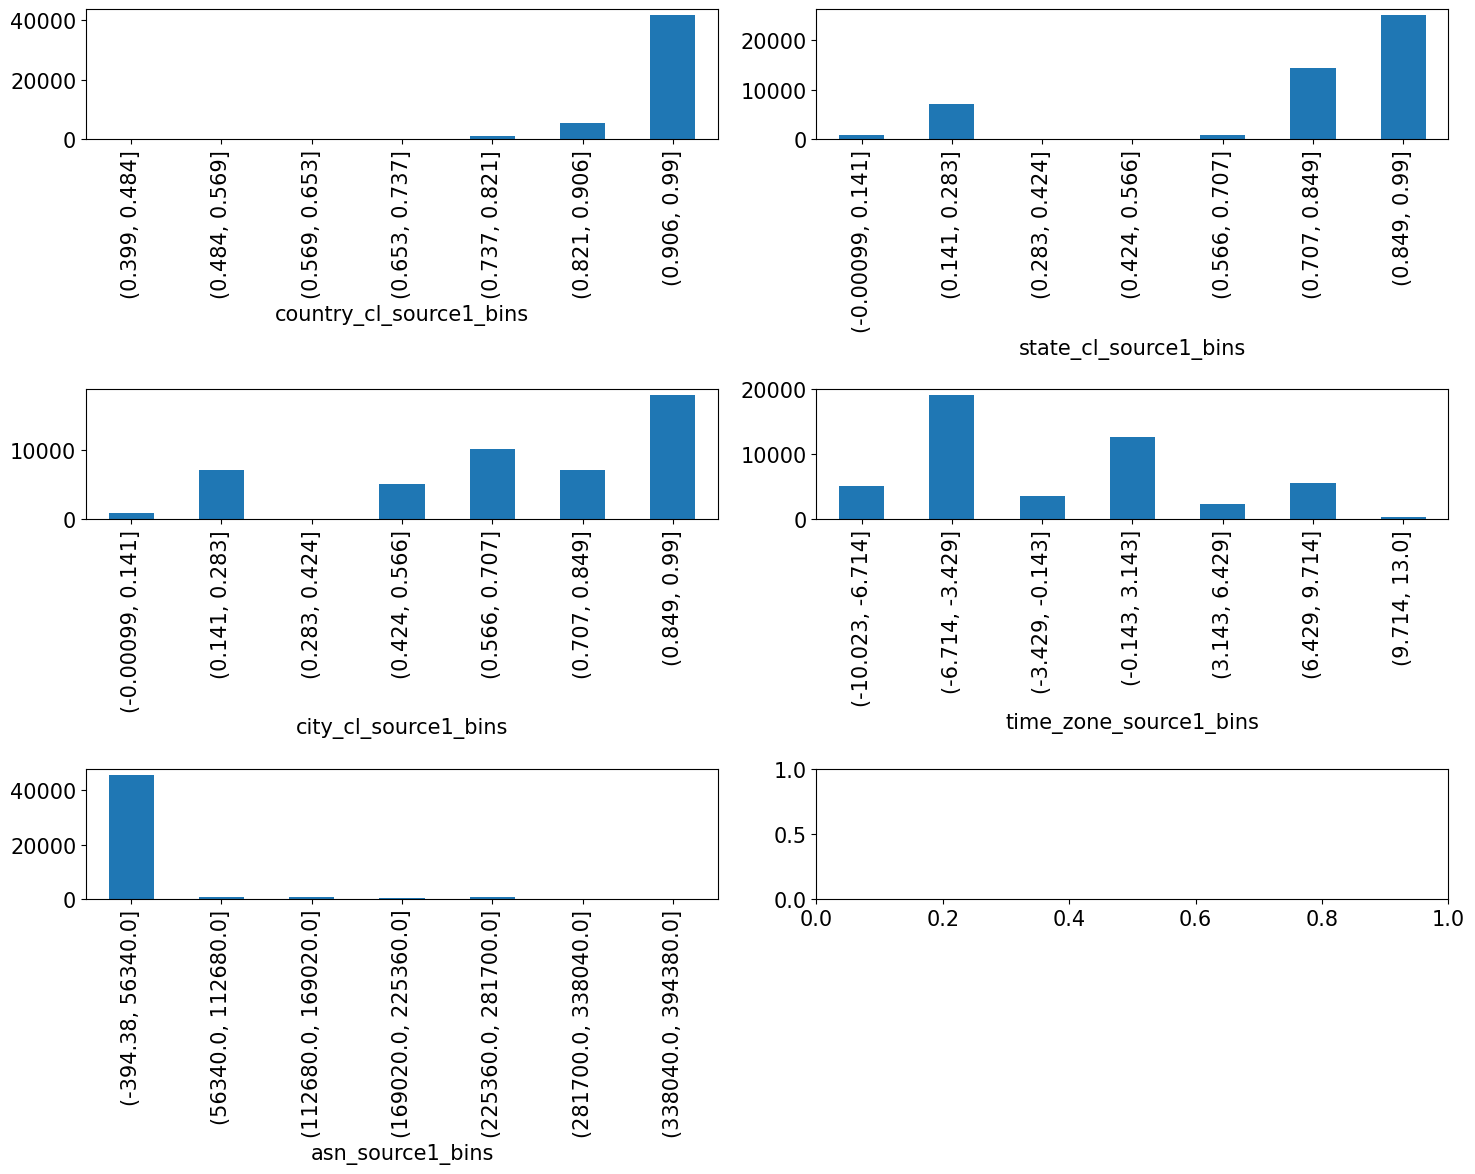

In [114]:
#Check if there are any data leakage in each of the source, by binning contiounous vars from each d
#datasource 
src1_feat_distribution = src1
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
for n, feat in enumerate(src1_numerical_feat):
    ax = plt.subplot(3, 2, n + 1)
    src1_feat_distribution[feat + '_bins'] = pd.cut(src1_feat_distribution[feat], 7)
    src1_bin = src1_feat_distribution.groupby(feat + '_bins').fraud_label.count()
    src1_bin.plot(kind='bar', ax=ax)
#     print(src1_bin)

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
for n, feat in enumerate(src1_categorical_feats):
    ax = plt.subplot(3, 2, n + 1)
    src1_bin = src1_feat_distribution.groupby(feat).fraud_label.count()
#     src1_bin.plot(kind='bar', ax=ax)
    print(src1_bin)

<Figure size 1000x500 with 0 Axes>

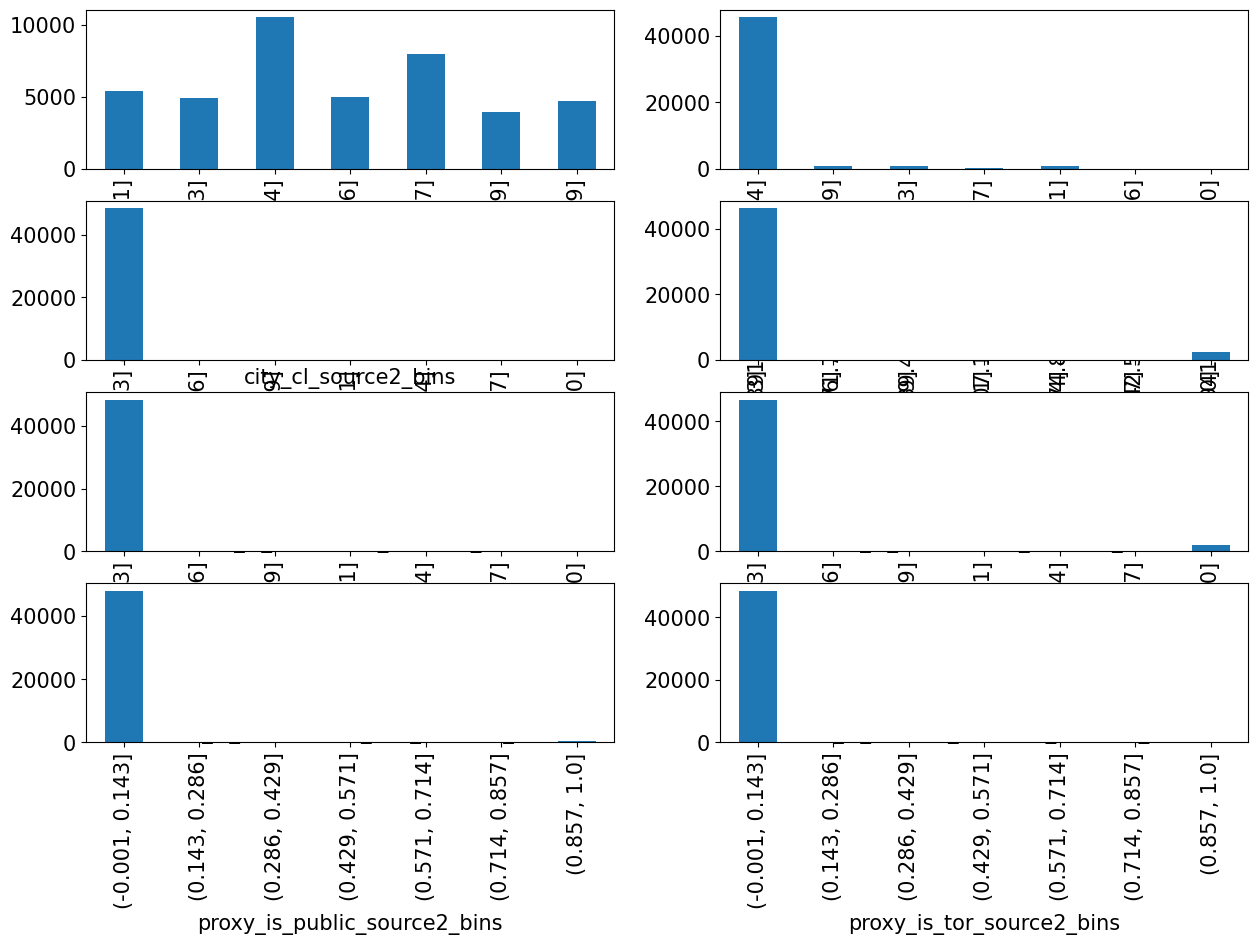

In [120]:
src2_feat_distribution = src2
plt.subplots_adjust(hspace=0.5)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
for n, feat in enumerate(src2_num_feats):
    ax = plt.subplot(5, 2, n + 1)
    src2_feat_distribution[feat + '_bins'] = pd.cut(src2_feat_distribution[feat], 7)
    src2_bin = src2_feat_distribution.groupby(feat + '_bins').fraud_label.count()
    src2_bin.plot(kind='bar', ax=ax)
#     print(src1_bin)